In [51]:
import pathlib

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio
from skimage import morphology
from skimage import filters
from skimage import transform
from tqdm import tqdm


In [54]:
def load_image(path):
    raw_image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(raw_image, channels=1)
    image = tf.image.resize(image, (256, 256), method="nearest")
    image = tf.cast(image, tf.float32) / 255.0
    image = image > 0.5
    return image


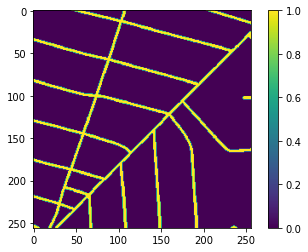

In [55]:
path = "/Users/hagayuya/GradRes/DataSets/ibarakimap_s17/train/map/12.jpg"
path = "/Users/hagayuya/Datasets/mass_roads9/train/map/10378705_15_3_2_2.png"
image = load_image(path)

plt.imshow(image)
plt.colorbar()
plt.show()


In [68]:
mr_sums = []
ibr_sums = []

mr_path = pathlib.Path("/Users/hagayuya/Datasets/mass_roads9/train/map")
ibr_path = pathlib.Path("../../Datasets/ibarakimap_s17/train/map")
for path in tqdm(list(mr_path.glob("*.png"))):
    im = load_image(str(path))
    # im = morphology.skeletonize(im)
    mr_sums.append(np.sum(im))


for path in tqdm(list(ibr_path.glob("*.jpg"))):
    im = load_image(str(path))
    # im = morphology.skeletonize(im)
    ibr_sums.append(np.sum(im))


100%|██████████| 1000/1000 [00:02<00:00, 443.27it/s]


4790.484522125298


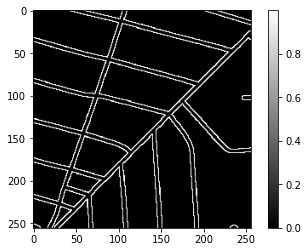

In [58]:
path = "/Users/hagayuya/Datasets/mass_roads9/train/map/10378705_15_3_2_2.png"
im = skio.imread(path, as_gray=True)
im = transform.resize(im, (256, 256), order=0)
# im = cv2.resize(im, (256, 256), interpolation=cv2.INTER_NEAREST)
im = (im > 0) - im
print(np.sum(im))

plt.imshow(im, cmap="gray")
plt.colorbar()
plt.show()


In [ ]:
print(np.sum(im))
plt.imshow(im, cmap="gray")
plt.colorbar()
plt.show()


In [ ]:
im = im > 0.99
print(np.sum(im))

plt.imshow(im, cmap="gray")
plt.show()
im = morphology.skeletonize(im)
plt.imshow(im, cmap="gray")
plt.show()
print(np.sum(im))


In [59]:
mr_sums_ary = np.array(mr_sums)
m = np.mean(mr_sums_ary)
v = np.var(mr_sums_ary)
mr_sums_ary = (mr_sums_ary - m) / v

ibr_sums_ary = np.array(ibr_sums)
m = np.mean(ibr_sums_ary)
v = np.var(ibr_sums_ary)
ibr_sums_ary = (ibr_sums_ary - m) / v


 mr m 3125.4263939029283
ibr m 6194.731
 mr v 2634.9616368773186
ibr v 2936.0120787624496


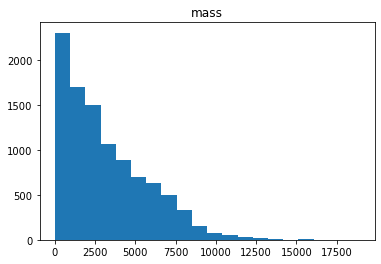

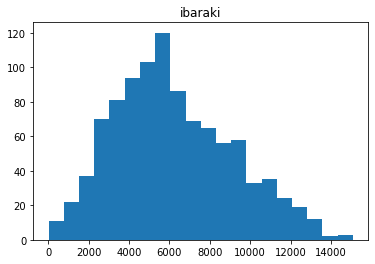

In [69]:
print(" mr m", np.mean(mr_sums))
print("ibr m", np.mean(ibr_sums))
print(" mr v", np.sqrt(np.var(mr_sums)))
print("ibr v", np.sqrt(np.var(ibr_sums)))

plt.hist(mr_sums, bins=20)
plt.title("mass")
plt.show()
plt.hist(ibr_sums, bins=20)
plt.title("ibaraki")
plt.show()
